In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

data = Path("../data")
plot_path = data / "plots"
studio_path = data / "studios"
map_path = data / "graph3_map"
stat_path = map_path / "stats"
geojson_path = map_path / "geojson"

In [2]:
animes = pd.read_csv(data / "AnimeList.csv")
print("Number of animes: {:,}".format(animes["anime_id"].nunique())) # same as number of rows
animes.head()

Number of animes: 14,478


,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


# Prepare data for studio EDA

- Remove the rows with null studio

14,478 animes -> 8,544 (-41%)

In [3]:
anime_studios = animes[animes["studio"].notnull()]
num_animes = len(anime_studios["anime_id"])
print("Number of animes: {:,}".format(num_animes))

Number of animes: 8,544


- Some studios have encoded names so we decode them, e.g. "Brain`&#039;`s Base" -> "Brain's Base"

In [4]:
import html
anime_studios["studio"] = anime_studios["studio"].apply(html.unescape)

/tmp/ipykernel_3181/1398867777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_studios["studio"] = anime_studios["studio"].apply(html.unescape)


- For animes that have multiple studios, duplicate the entry for each studio

8,544 rows -> 9,113 rows

In [5]:
# for the animes that have a "studio" column of the form "studio1, studio2, ..., studion", duplicate the anime n-1 times and assign the studio1, studio2, ..., studion to the new animes
animes_multiple_studios = anime_studios[anime_studios["studio"].str.contains(",")]
animes_multiple_studios.loc[:, "studio"] = animes_multiple_studios.loc[:, "studio"].str.split(", ")
animes_multiple_studios = animes_multiple_studios.explode("studio")

# merge the results with the original dataframe
anime_studios = pd.concat(
    [
        anime_studios[~anime_studios["studio"].str.contains(",")],
        animes_multiple_studios,
    ],
    axis=0,
)
assert anime_studios["anime_id"].nunique() == num_animes

/tmp/ipykernel_3181/1307074769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animes_multiple_studios.loc[


In [6]:
# strip all studios
anime_studios["studio"] = anime_studios["studio"].str.strip()

anime_studios

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13756,1178,Detonator Orgun,Detonator Orgun,デトネイター・オーガン,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,3,Finished Airing,...,NaN,NaN,NaN,[],Darts,Central Park Media,Artmic,"Action, Sci-Fi, Mecha",[],"['#1: ""Bandeira Ryokou Dan"" by Susumu Hirasawa..."
13775,1623,G-On Riders,NaN,G-on らいだーす,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,13,Finished Airing,...,NaN,Summer 2002,Tuesdays at 18:30 (JST),"{'Adaptation': [{'mal_id': 20032, 'type': 'man...",NaN,NaN,Shaft,"Action, Sci-Fi, Comedy, School","['""Tokimeite, G-on G! (トキメイテ, G-on G!)"" by Shi...","['#1: ""Miracle☆Pajama (ミラクル☆パジャマ)"" by Lolivade..."
13775,1623,G-On Riders,NaN,G-on らいだーす,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,13,Finished Airing,...,NaN,Summer 2002,Tuesdays at 18:30 (JST),"{'Adaptation': [{'mal_id': 20032, 'type': 'man...",NaN,NaN,TNK,"Action, Sci-Fi, Comedy, School","['""Tokimeite, G-on G! (トキメイテ, G-on G!)"" by Shi...","['#1: ""Miracle☆Pajama (ミラクル☆パジャマ)"" by Lolivade..."
13795,478,Sousei no Aquarion,Aquarion,創聖のアクエリオン,"Genesis of Aquarion, Holy Genesis Aquarion",https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,26,Finished Airing,...,NaN,Spring 2005,Unknown,"{'Adaptation': [{'mal_id': 17942, 'type': 'man...","Media Factory, Bandai, Tohokushinsha Film Corp...",Funimation,Satelight,"Action, Mecha, Romance, Super Power, Supernatu...","['#1: ""Sousei no Aquarion"" by AKINO (eps 2-17)...","['#01 ""Omna Magni"" by Yui Makino (eps 2-13, 15..."


## Comparison with the studios scraped from MAL

- Our dataset (`studios_db`) contains 509 studio
- The scraped dataset (`studios_mal`) contains 2,231 studios

In [7]:
studios_db = anime_studios["studio"].unique()
studios_mal = pd.read_csv(studio_path / "studios_mal_clean.csv")
print(len(studios_db), len(studios_mal))

509 2231


In [8]:
# Print the studios that are in studios_db but not in studios_mal
studios_db_not_mal = set(studios_db) - set(studios_mal["studio_en"].values)
print(len(studios_db_not_mal))
print(*studios_db_not_mal, sep="\n")

40
TYPHOON GRAPHICS
Studio Anima
Studio LAN
Xebec Zwei
Studio Pierrot
Sting Ray
Signal. MD
G.CMay Animation & Film
AIC Plus+
SOEISHINSHA
Studio Blanc
Ajia-Do
Imagica Image Works
REVOROOT
Shanghai Foch Film Culture Investment
Ashi Production
Fukushima Gainax
Craftar
Media Bank
Pie in The Sky
Daichi Doga
Success Co.
DandeLion Animation Studio LLC
Telescreen BV
AIC A.S.T.A.
2:10 Animation
Pine Jam
Cyclone Graphics inc
Studio Gallop
EMT²
Inc.
Diomedea
NUT
Asread
Studio 9 MAiami
M2
Yamamura Animation
Animate Film
Oz
Silver Link.


In [9]:
# Print the studios that are in studios_mal but not in studios_db
studios_mal_not_db = studios_mal[~studios_mal["studio_en"].isin(studios_db)]["studio_en"].values
print(len(studios_mal_not_db))
print(*studios_mal_not_db, sep="\n")

1762
Pierrot
Sony Pictures Entertainment
TV Tokyo
Aniplex
VAP
Ajia-do
Geneon Universal Entertainment
WOWOW
Gallop
m.o.e.
GDH
KSS
Diomedéa
Avex Entertainment
Dentsu
TV Asahi
Beat Frog
Frontier Works
Shogakukan-Shueisha Productions
OB Planning
Mellow Head
Yomiuri Telecasting
Marvelous
Konami
AIC ASTA
Starchild Records
ADV Films
Sav! The World Productions
TV Osaka
Funimation
Lantis
Media Factory
Shochiku
Kadokawa Shoten
Broccoli
Studio Izena
VIZ Media
Active
Victor Entertainment
Animac
Yomiko Advertising
Souten Studio
Silky’s
CherryLips
Shinyusha
HoriPro
MediaNet
Nihon Ad Systems
Animax
Asatsu DK
Mainichi Broadcasting System
Pony Canyon
TBS
CBC Television
SKY Perfect Well Think
Hakusensha
SME Visual Works
SoftX
animate Film
Polygram Japan
BMG Japan
Kids Station
Kodansha
Rondo Robe
Sogo Vision
asread.
d-rights
Marubeni
Movic
Sega
Shelty
Imagica
Alchemist
Blue Impact
Trilogy Future Studio
Age
Ai ga areba Daijobu
RCC Chugoku Broadcasting
ANIK
Pixy
Gakken
Visual Arts
Pioneer LDC
Digital Works

- There are inconsistencies in the studio names between the two databases. We solve them by applying the following mapping:

In [10]:
db_to_mal = {
    "2:10 Animation": "2:10 AM Animation",
    "AIC A.S.T.A.": "AIC ASTA",
    "AIC Plus+": "AIC PLUS+",
    "Ajia-Do": "Ajia-do",
    "Animate Film": "animate Film",
    "Ashi Production": "Ashi Productions",
    "Asread": "asread.",
    "Craftar": "Craftar Studios",
    "Cyclone Graphics inc": "Cyclone Graphics",
    "Daichi Doga": "Dai-Ichi Douga",
    "DandeLion Animation Studio LLC": "DandeLion Animation Studio",
    "Diomedea": "Diomedéa",
    "EMT²": "EMT Squared",
    "Fukushima Gainax": "Fukushima Gaina",
    "G.CMay Animation & Film": "CMAY Animation",
    "Imagica Image Works": "Imagica Imageworks",
    "Inc.": "Yamamura Animation, Inc.",
    "M2": "Studio M2",
    "Media Bank": "Mediabank",
    "NUT": "Nut",
    "Oz": "Oz Inc.",
    "Pie in The Sky": "Pie in the sky",
    "Pine Jam": "PINE JAM",
    "REVOROOT": "Revoroot",
    "Shanghai Foch Film Culture Investment": "Foch Films",
    "Signal. MD": "Signal.MD",
    "Silver Link.": "Silver",
    "SOEISHINSHA": "Soeishinsha",
    "Sting Ray": "Stingray",
    "Studio 9 MAiami": "Studio 9 Maiami",
    "Studio Anima": "Anima",
    "Studio Blanc": "Studio Blanc.",
    "Studio Gallop": "Gallop",
    "Studio LAN": "LAN Studio",
    "Studio Pierrot": "Pierrot",
    "Success Co.": "Success Corp.",
    "Telescreen BV": "Telescreen",
    "TYPHOON GRAPHICS": "Typhoon Graphics",
    "Yamamura Animation": "Yamamura Animation, Inc.",
    "Xebec Zwei": "Xebec",
}

anime_studios["studio"] = anime_studios["studio"].replace(db_to_mal)

Now all studios in `studios_db` are in `studios_mal`

There are 507 studios now, since
- Inc. was merged with Yamamura Animation, Inc.
- Xebec Zwei was merged with Xebec

In [11]:
studios_db = anime_studios["studio"].unique()
studios_db_not_mal = set(studios_db) - set(studios_mal["studio_en"].values)
assert len(studios_db_not_mal) == 0
print(len(studios_db))

507


## Save the data

In [12]:
# write animes_clean to csv
anime_studios.to_csv(data / "AnimeList_clean.csv", index=False)

In [13]:
# Sort animes_clean["studio"] by the alphabetical order IF THE NAME WERE ALL LOWERCASE
studios_db = sorted(anime_studios["studio"].unique(), key=lambda x: x.lower())

# write the list of unique studios in a file
with open(studio_path / "studios_db.txt", "w") as f:
    for studio in studios_db:
        f.write(studio + "\n")

# Statistics

## Number of animes per studio

In [14]:
# Number of animes per studio
studio_num_animes = (
    anime_studios.groupby(["studio"])
    .agg({"anime_id": "count"})
    .rename(columns={"anime_id": "num_animes"})
    .sort_values(by="studio")
)
studio_num_animes.to_csv(stat_path / "studio_num_animes.csv")

## Stats related to countries

### Prepare data


In [15]:
import dask.dataframe as dd

#### User-Country

In [16]:
user_country = pd.read_csv(map_path / "users_country_aff.csv")
user_country = user_country[user_country["country"] != "Japan"]
user_country = dd.from_pandas(user_country[["username", "country"]], npartitions=1).persist()
user_country

,username,country
npartitions=1,,
0,object,object
136044,...,...


#### User-Animes

In [17]:
user_animes = dd.read_csv(data /
    "UserAnimeList.csv",
    dtype={
        "username": "object",
        "anime_id": "int64",
        "my_watched_episodes": "int64",
        "my_start_date": "str",
        "my_finish_date": "str",
        "my_score": "int64",
        "my_status": "int64",
        "my_rewatching": "float64",
        "my_rewatching_ep": "int64",
        "my_last_updated": "int64",
        "my_tags": "object",
    },
    usecols=[
        "username",
        "anime_id",
        "my_watched_episodes",
        "my_start_date",
        "my_finish_date",
        "my_score",
        "my_status",
        "my_rewatching",
        "my_rewatching_ep",
        "my_last_updated",
        "my_tags",
    ],
).persist()

user_animes

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
npartitions=78,,,,,,,,,,,
,object,int64,int64,object,object,int64,int64,float64,int64,int64,object
,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...


#### User-Country-Animes

In [18]:
# Merge users_animes with users_country_aff
user_country_animes = user_country.merge(user_animes, on="username", how="inner").persist()
user_country_animes

,username,country,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
npartitions=78,,,,,,,,,,,,
,object,object,int64,int64,object,object,int64,int64,float64,int64,int64,object
,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...


#### Anime-Studios

In [19]:
anime_studios = dd.read_csv(data / "AnimeList_clean.csv").persist()
anime_studios

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,object,object,object,object,object,object,object,int64,object,bool,object,object,object,object,float64,int64,float64,int64,int64,int64,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


#### User-Country-Animes-Studios

In [20]:
user_country_animes_studios = user_country_animes[["username","country","anime_id"]].merge(anime_studios[["anime_id", "studio"]], on="anime_id", how="inner").persist()
user_country_animes_studios

,username,country,anime_id,studio
npartitions=78,,,,
,object,object,int64,object
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


### Statistics

#### Studio-Country-Number of ratings for that studio in that country

In [21]:
studio_country_num_ratings = (
    user_country_animes_studios.groupby(["studio", "country"])
    .agg({"username": "count"})
    .rename(columns={"username": "num_ratings"})
    .sort_values(["studio", "num_ratings"], ascending=[True, False])
)
studio_country_num_ratings.to_csv(stat_path / "studio_country_num_ratings.csv")
studio_country_num_ratings

,num_ratings
npartitions=1,
,int64
,...


#### Studio-Number of countries

The studios that have exported their animes to the most countries in the world

In [22]:
studio_num_countries = (
    studio_country_num_ratings.reset_index()
    .groupby(["studio"])
    .agg({"country": "count"})
    .rename(columns={"country": "num_countries"})
    .sort_values(by=["num_countries", "studio"], ascending=[False, True])
)

import numpy as np

num_countries_unique = studio_num_countries["num_countries"].unique().compute()
# Add a column "rank" to studio_num_countries that contains the rank of the studio according to the index+1 of num_countries in num_countries_unique
studio_num_countries["rank"] = studio_num_countries["num_countries"].apply(
    lambda x: np.where(num_countries_unique == x)[0][0] + 1,
    meta=("num_countries", "int64"),
)

studio_num_countries.to_csv(stat_path / "studio_num_countries.csv")

['/home/julien/Documents/project-2023-vizmoica/data/graph3_map/stats/studio_num_countries.csv/0.part']

#### Studio-Total number of ratings

The most popular studios

In [23]:
studio_total_ratings = (
    studio_country_num_ratings.reset_index()
    .groupby(["studio"])
    .agg({"num_ratings": "sum"})
    .rename(columns={"num_ratings": "total_ratings"})
    .sort_values(by=["total_ratings", "studio"], ascending=[False, True])
)

total_ratings_unique = studio_total_ratings["total_ratings"].unique().compute()
studio_total_ratings["rank"] = studio_total_ratings["total_ratings"].apply(
    lambda x: np.where(total_ratings_unique == x)[0][0] + 1,
    meta=("total_ratings", "int64"),
)

studio_total_ratings.to_csv(stat_path / "studio_total_ratings.csv")

['/home/julien/Documents/project-2023-vizmoica/data/graph3_map/stats/studio_total_ratings.csv/0.part']

# Plots

## Number of countries per studio

Here we plot the 20 studios that have exported their animes to the most countries in the world

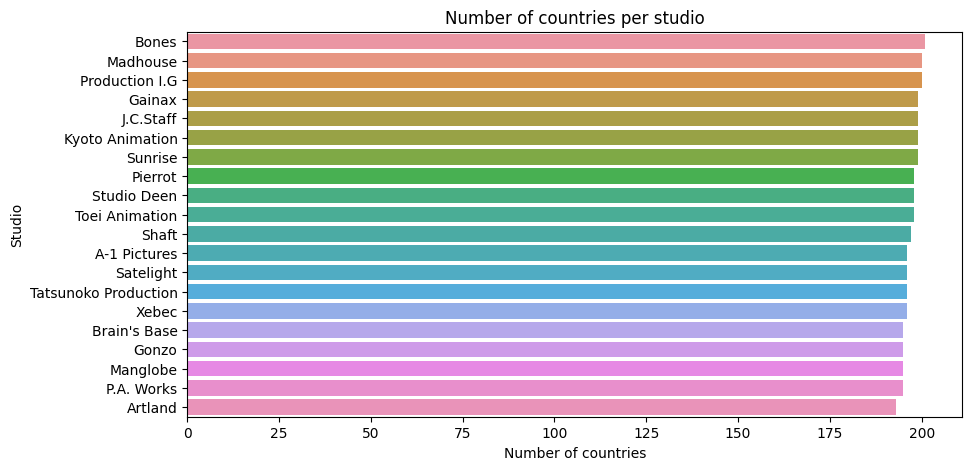

In [24]:
df_studio_num_countries = pd.read_csv(stat_path / "studio_num_countries.csv/0.part")
df_studio_num_countries = df_studio_num_countries[:20]

plt.figure(figsize=(10, 5))
plot = sns.barplot(
    x="num_countries",
    y="studio",
    data=df_studio_num_countries,
    order=df_studio_num_countries["studio"].unique(),
)
plt.title("Number of countries per studio")
plt.xlabel("Number of countries")
plt.ylabel("Studio")
plt.show()
plot.get_figure().savefig(plot_path / "studio_num_countries.png")

## Number of ratings per studio

Here we plot the 20 most popular studios

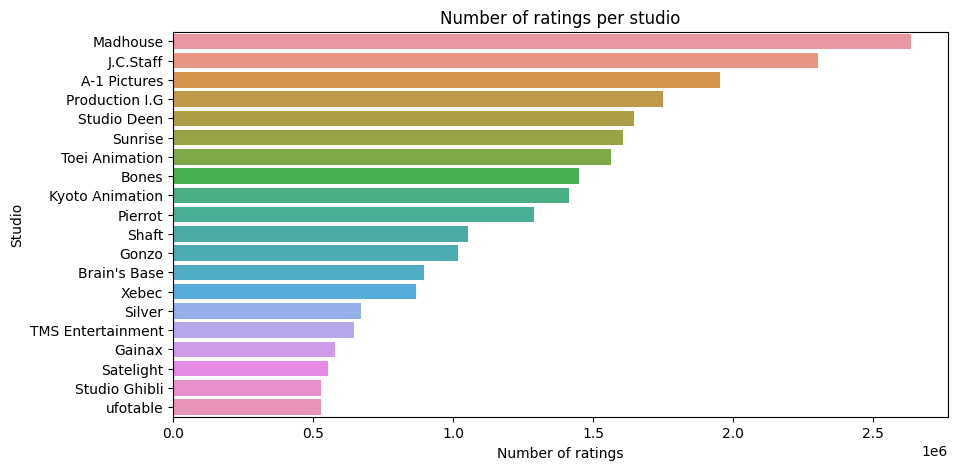

In [25]:
df_studio_total_ratings = pd.read_csv(stat_path / "studio_total_ratings.csv/0.part")
df_studio_total_ratings = df_studio_total_ratings[:20]


plt.figure(figsize=(10, 5))
plot = sns.barplot(
    x="total_ratings",
    y="studio",
    data=df_studio_total_ratings,
    order=df_studio_total_ratings["studio"].unique(),
)

plt.title("Number of ratings per studio")
plt.xlabel("Number of ratings")
plt.ylabel("Studio")
plt.show()
plot.get_figure().savefig(plot_path / "studio_total_ratings.png")